# Exercise 2.7

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d = {'X1': pd.Series([0,2,0,0,-1,1]),
     'X2': pd.Series([3,0,1,1,0,1]),
     'X3': pd.Series([0,0,3,2,1,1]),
     'Y': pd.Series(['Red','Red','Red','Green','Green','Red'])}
df = pd.DataFrame(d)
df.index = np.arange(1, len(df) + 1)
df

,X1,X2,X3,Y
1,0,3,0,Red
2,2,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


## (a) Euclidian distance

In [4]:
from math import sqrt
df['distance']=np.sqrt(df['X1']**2+df['X2']**2+df['X3']**2)
df

,X1,X2,X3,Y,distance
1,0,3,0,Red,3.000000
2,2,0,0,Red,2.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


## (b) K=1

In [5]:
df.sort_values(['distance'])

,X1,X2,X3,Y,distance
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051
2,2,0,0,Red,2.000000
4,0,1,2,Green,2.236068
1,0,3,0,Red,3.000000
3,0,1,3,Red,3.162278


## (c) K=3

Nesse caso so precisamos observar os top 3 registros e fazermos a votação. Logo, temos que o 3NN classificaria como vermelho.



## (d) Highly non-linear Bayes decision boundary

Altos valores de K tendem a uma suavização do modelo, como se as não linearidades se somassem e tirassem uma média. Isso acontece pois o KNN executa uma votação majoritária 

# Exercise 2.8

## (a)

In [2]:
import pandas as pd

dt = pd.read_csv('College.csv')
dt

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


## (b)

In [8]:
dt = dt.rename({'Unnamed: 0': 'College'}, axis = 1)

In [9]:
dt = dt.set_index("College")

## (C)

In [10]:
dt.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## (d)

In [8]:
a = dt [['Top10perc', 'Apps', 'Enroll']]

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

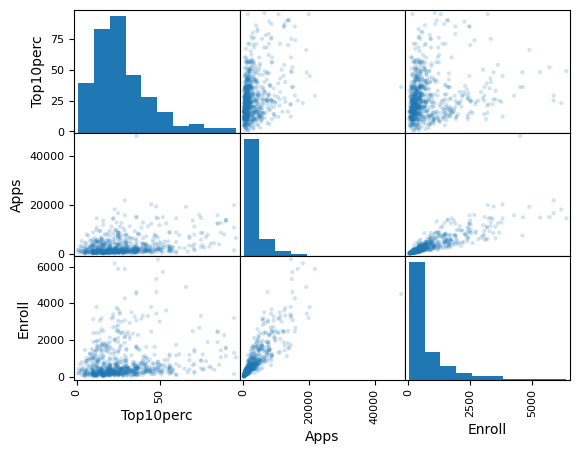

In [9]:
pd.plotting.scatter_matrix(frame = dt[['Grad.Rate', 'Apps', 'Enroll']], alpha=0.2)

## (e)

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

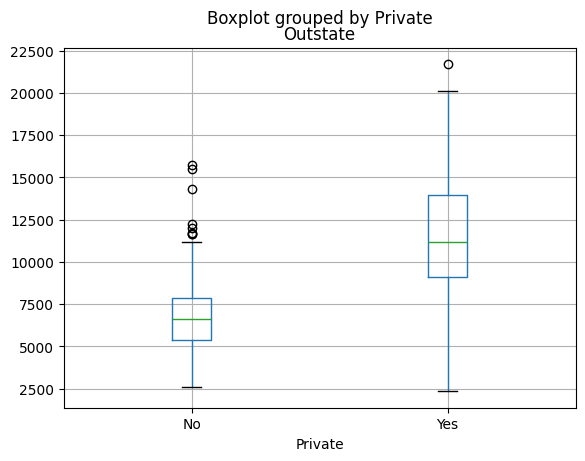

In [15]:
dt.boxplot(column='Outstate',by='Private')

## (f)

In [23]:
dt['Elite'] = pd.cut(dt['Top10perc']/dt['Enroll'],
[0,0.5,1],
labels=['No', 'Yes'])

In [47]:
dt['Grad.Rate'].value_counts()

Grad.Rate
72     24
67     23
63     22
58     22
65     21
       ..
32      1
27      1
118     1
10      1
30      1
Name: count, Length: 81, dtype: int64

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

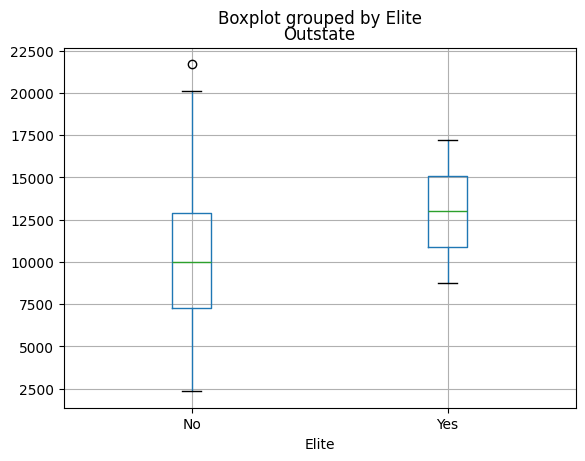

In [31]:
dt.boxplot(column='Outstate',by='Elite')

## (g)

(array([399., 273.,  75.,  14.,   7.,   2.,   2.,   3.,   1.,   1.]),
 array([ 3186. ,  8490.7, 13795.4, 19100.1, 24404.8, 29709.5, 35014.2,
        40318.9, 45623.6, 50928.3, 56233. ]),
 <BarContainer object of 10 artists>)

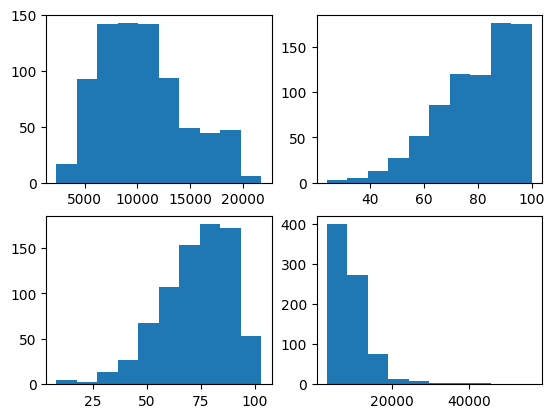

In [44]:
import matplotlib.pyplot as plt
fig,ax  = plt.subplots(2, 2)
ax[0,0].hist(dt['Outstate'])
ax[1,0].hist(dt['PhD'])
ax[0,1].hist(dt['Terminal'])
ax[1,1].hist(dt['Expend'])


array([[<Axes: xlabel='Grad.Rate', ylabel='Grad.Rate'>,
        <Axes: xlabel='Apps', ylabel='Grad.Rate'>,
        <Axes: xlabel='Enroll', ylabel='Grad.Rate'>],
       [<Axes: xlabel='Grad.Rate', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Grad.Rate', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

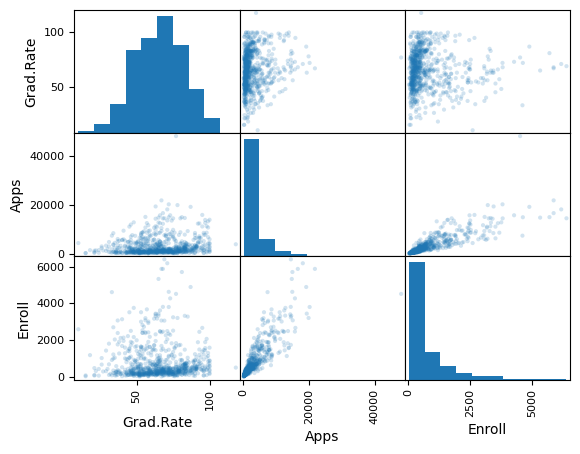

In [48]:
pd.plotting.scatter_matrix(frame = dt[['Grad.Rate', 'Apps', 'Enroll']], alpha=0.2)

In [59]:
import seaborn as sb
# plotting correlation heatmap 
dt.corr(numeric_only=True)['Grad.Rate'].sort_values()

S.F.Ratio     -0.306710
Personal      -0.269344
P.Undergrad   -0.257001
F.Undergrad   -0.078773
Enroll        -0.022341
Books          0.001061
Accept         0.067313
Apps           0.146755
Terminal       0.289527
PhD            0.305038
Expend         0.390343
Room.Board     0.424942
Top25perc      0.477281
perc.alumni    0.490898
Top10perc      0.494989
Outstate       0.571290
Grad.Rate      1.000000
Name: Grad.Rate, dtype: float64

# Exercise 2.9

In [22]:
auto = pd.read_csv('./datasets/Auto.csv', na_values = '?' )
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


## (a)

In [33]:
auto.iloc[100:106]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
100,18.0,6,250.0,88.0,3021,16.5,73,1,ford maverick
101,23.0,6,198.0,95.0,2904,16.0,73,1,plymouth duster
102,26.0,4,97.0,46.0,1950,21.0,73,2,volkswagen super beetle
103,11.0,8,400.0,150.0,4997,14.0,73,1,chevrolet impala
104,12.0,8,400.0,167.0,4906,12.5,73,1,ford country
105,13.0,8,360.0,170.0,4654,13.0,73,1,plymouth custom suburb


mpg	cylinders	displacement	horsepower	weight	acceleration	year	origin are quantitative and name is qualitative

## (b), (c)

In [17]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## (d)

In [20]:
auto_cut = auto.iloc[10:85,:]

In [26]:
auto_cutted = auto.drop(auto_cut.index)

In [27]:
auto_cutted.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,322.000000,322.000000,322.000000,318.000000,322.000000,322.000000,322.000000,322.000000
mean,24.409317,5.378882,187.680124,101.235849,2936.807453,15.700621,77.130435,1.596273
std,7.913357,1.657398,100.120925,36.185088,810.987533,2.706436,3.131849,0.815572
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.250000,75.000000,2216.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,145.500000,90.500000,2797.500000,15.500000,77.000000,1.000000
75%,30.650000,6.000000,250.000000,115.000000,3516.000000,17.275000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


## (e)

### Analise Scatter:
Fazendo um scatterplot com os preditores Miles per Gallon, Displacment, horsepower, acceleration e weight, é possivel identificar várias correlações entre elas. MPG tem correlações negativas em relação ao Displecement e Horsepower, o que faz sentido dado que motores que sao maiores tendem a consumir mais combustivel e são mais pesados.

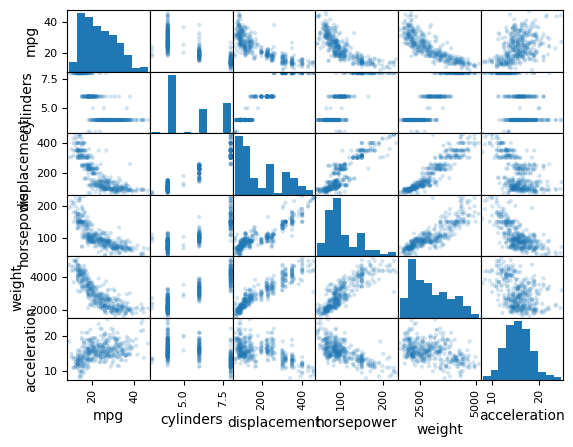

In [32]:
pd.plotting.scatter_matrix(frame = auto[['mpg','cylinders','displacement','horsepower','weight', 'acceleration']], alpha=0.2);

### Agrupando Valores:
#### Ano:
Agrupando o dataset por ano é possível ver uma possivel tendencia em existir carros mais economicos, na média, com o tempo.

<Axes: xlabel='year'>

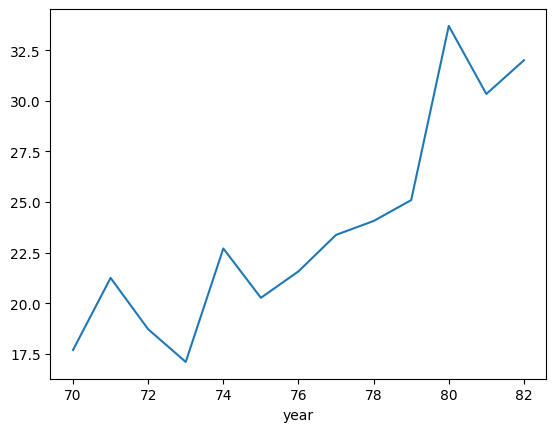

In [44]:
auto_by_year = auto.groupby('year').mean(numeric_only=True)
auto_by_year['mpg'].plot()

<Axes: xlabel='year'>

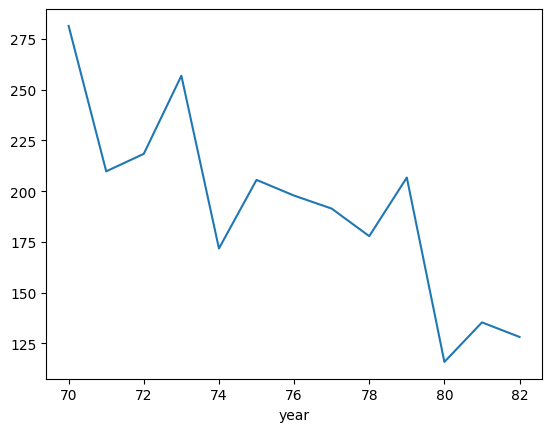

In [39]:
auto_by_year = auto.groupby('year').mean(numeric_only=True)
auto_by_year['displacement'].plot()

<Axes: xlabel='year'>

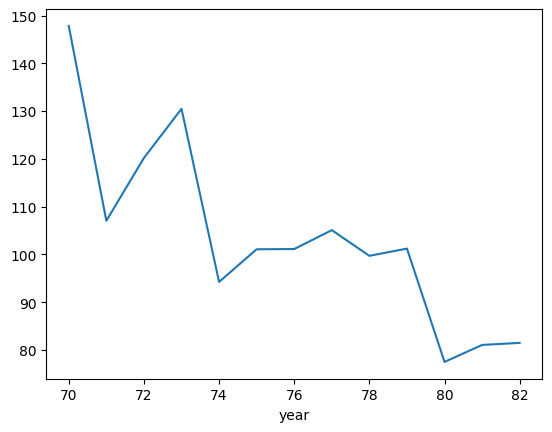

In [40]:
auto_by_year = auto.groupby('year').mean(numeric_only=True)
auto_by_year['horsepower'].plot()

<Axes: xlabel='year'>

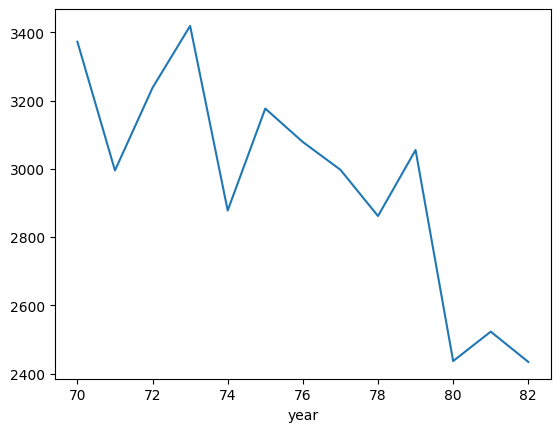

In [41]:
auto_by_year = auto.groupby('year').mean(numeric_only=True)
auto_by_year['weight'].plot()

#### Cilindros:

<Axes: xlabel='cylinders'>

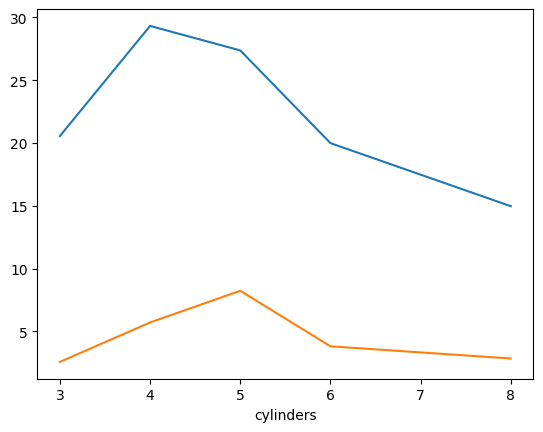

In [46]:
auto_by_cilinders = auto.groupby('cylinders').mean(numeric_only=True)
auto_by_cilinders2 = auto.groupby('cylinders').std(numeric_only=True)
auto_by_cilinders['mpg'].plot()
auto_by_cilinders2['mpg'].plot()


Para a análise da aceleração podemos identificar que a média de aceleração para motores com 5 cilindros é a maior, fato que não guarda correlação com a linearidade, merecendo um estudo mais meticuloso.

<Axes: xlabel='cylinders'>

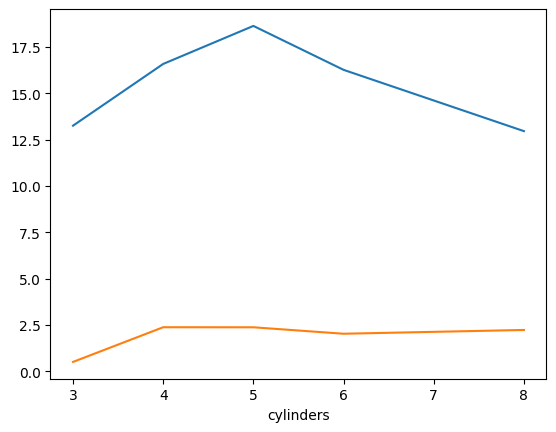

In [49]:
auto_by_cilinders['acceleration'].plot()
auto_by_cilinders2['acceleration'].plot()

## (f)
Para fazermos essa analise de quais preditores seriam boas features para o modelo de predição do mpg, a melhor ferramenta seria a matriz de correlação linear de Pearson, que mostra o grau de linearidade presente entre as variaveis.

In [53]:
auto.corr(numeric_only=True)['mpg'].sort_values()

weight         -0.831739
displacement   -0.804443
horsepower     -0.778427
cylinders      -0.776260
acceleration    0.422297
origin          0.563698
year            0.581469
mpg             1.000000
Name: mpg, dtype: float64

# Exercicio 2.10

## (a)

In [10]:
boston = pd.read_csv("datasets\Boston.csv", index_col = 0)

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\andre\AppData\Local\Temp\ipykernel_4024\2526254943.py:1: SyntaxWarning: invalid escape sequence '\B'
  boston = pd.read_csv("datasets\Boston.csv", index_col = 0)


## (b)

Miscellaneous Details


-Origin

The origin of the boston housing data is Natural.

-Usage

This dataset may be used for Assessment.

-Number of Cases

The dataset contains a total of 506 cases.

-Order

The order of the cases is mysterious.

-Variables

There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

-Note

Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000); Censoring is suggested by the fact that the highest median price of exactly $50,000 is reported in 16 cases, while 15 cases have prices between $40,000 and $50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.

In [11]:
print(boston.shape)
print(boston.head(5))

(506, 13)
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
1   4.98  24.0  
2   9.14  21.6  
3   4.03  34.7  
4   2.94  33.4  
5   5.33  36.2  


## (c)

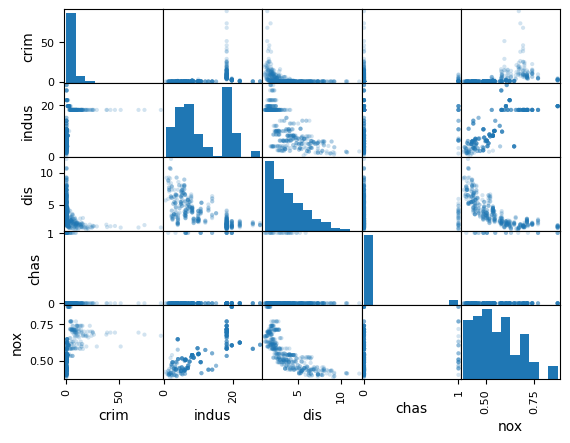

In [15]:
pd.plotting.scatter_matrix(frame = boston[['crim', 'indus', 'dis', 'chas', 'nox']], alpha=0.2);

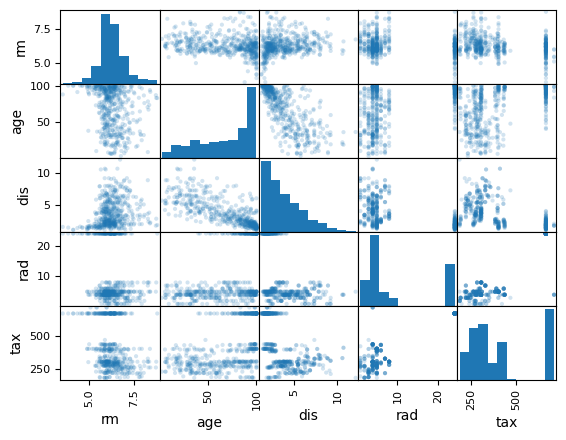

In [16]:
pd.plotting.scatter_matrix(frame = boston[['rm',   'age',     'dis',  'rad',  'tax']], alpha=0.2);

In [17]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## (d)

In [21]:
boston.corrwith(boston['crim']).sort_values()

medv      -0.388305
dis       -0.379670
rm        -0.219247
zn        -0.200469
chas      -0.055892
ptratio    0.289946
age        0.352734
indus      0.406583
nox        0.420972
lstat      0.455621
tax        0.582764
rad        0.625505
crim       1.000000
dtype: float64

Olhando para o vetor gerado acima é possivel ver uma correlação entre 'crim' e 'rad','tax' e 'lstat'.

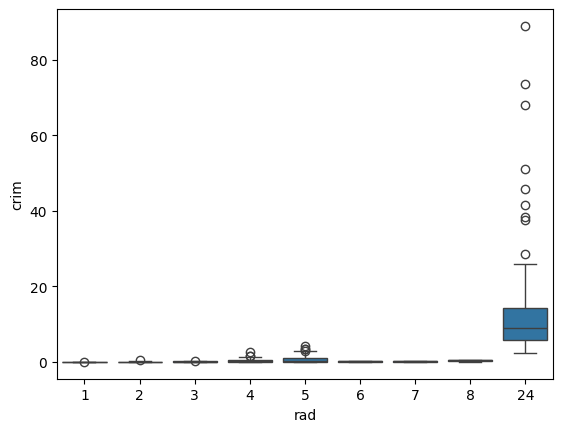

In [23]:
import seaborn as sns
ax = sns.boxplot(x="rad", y="crim", data=boston)

Quando RAD é igual a 24 (o valor mais alto), a media de CRIM é muito maior e amplitude de CRIM amplia bastante 

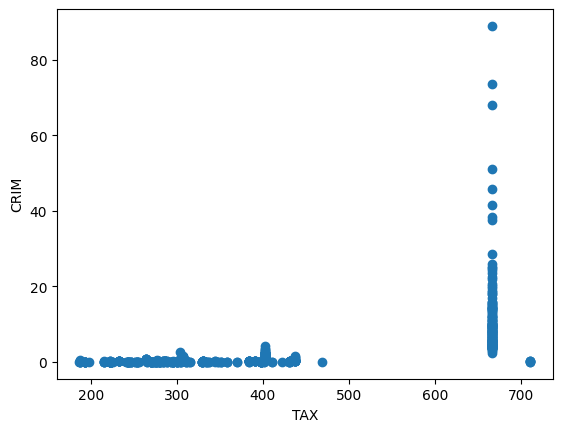

In [28]:
plt.scatter(boston['tax'], boston['crim'])
plt.xlabel('TAX')
plt.ylabel('CRIM');

Quando TAX é igual a 666, a media de CRIM é muito maior e amplitude de CRIM amplia bastante 

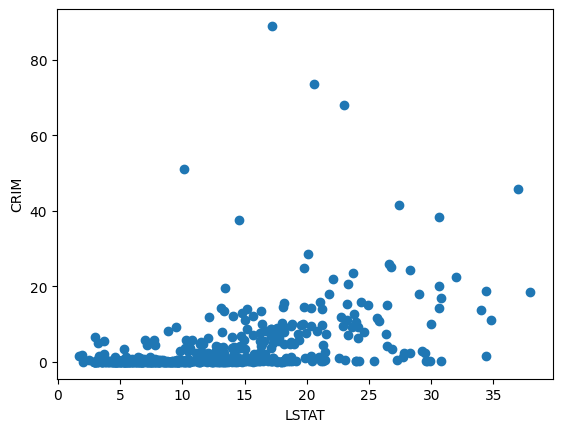

In [30]:
plt.scatter(boston['lstat'], boston['crim'])
plt.xlabel('LSTAT')
plt.ylabel('CRIM');

## (e)

In [32]:
boston.iloc[boston['crim'].nlargest(5).index]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
382,15.8744,0.0,18.1,0,0.671,6.545,99.1,1.5192,24,666,20.2,21.08,10.9
420,11.8123,0.0,18.1,0,0.718,6.824,76.5,1.7940,24,666,20.2,22.74,8.4
407,20.7162,0.0,18.1,0,0.659,4.138,100.0,1.1781,24,666,20.2,23.34,11.9
412,14.0507,0.0,18.1,0,0.597,6.657,100.0,1.5275,24,666,20.2,21.22,17.2
416,18.0846,0.0,18.1,0,0.679,6.434,100.0,1.8347,24,666,20.2,29.05,7.2


In [33]:
boston.iloc[boston['tax'].nlargest(5).index]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
490,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,23.97,7.0
491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,29.68,8.1
492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6
493,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,13.35,20.1
494,0.17331,0.0,9.69,0,0.585,5.707,54.0,2.3817,6,391,19.2,12.01,21.8


In [34]:
boston.iloc[boston['ptratio'].nlargest(5).index]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
356,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,5.57,20.6
357,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,17.60,17.8
129,0.32543,0.0,21.89,0,0.624,6.431,98.8,1.8125,4,437,21.2,15.39,18.0
130,0.88125,0.0,21.89,0,0.624,5.637,94.7,1.9799,4,437,21.2,18.34,14.3
131,0.34006,0.0,21.89,0,0.624,6.458,98.9,2.1185,4,437,21.2,12.60,19.2


In [35]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Os cinco bairros com maior criminalidade tem valores que superam 2 desvios-padrão, indicando que eles tem uma criminalidade rara

os cinco bairros com maior TAX possuem o valor maximo da variavel



## (f)

In [37]:
boston['chas'].value_counts()[1]

35

## (g)

In [38]:
boston.describe().iloc[5,10]

19.05